# Breast Cancer Prediction Using Naïve Bayes Algorithm

This notebook builds a simple but effective machine learning pipeline to classify breast tumors as either malignant (M) or benign (B).
Breast Cancer Wisconsin Dataset stored in a CSV file called "breast-cancer.csv" is used.
The goal is to train a Naïve Bayes model on the data, test its performance, and evaluate how well it can predict new cases.

The general steps are:
1. Load and explore the dataset
2. Clean and preprocess the data
3. Split into train and test sets
4. Train the Naïve Bayes model
5. Evaluate the model using accuracy, precision, recall, F1 score, and visualizations


In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve


# Load the Breast Cancer Dataset

Read the breast cancer data from the CSV file using pandas and also take a quick look at the first few rows to understand the structure.


In [ ]:
# Load the dataset
df = pd.read_csv("breast-cancer.csv")

# View the top 5 rows
df.head()


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

# Clean and Prepare the Data

The following will be done:
- Drop any unnecessary columns (like ID)
- Encode the diagnosis labels (M = 1, B = 0)
- Check for missing values
- Standardize the numeric features using StandardScaler

In [5]:
# Drop any non-feature columns if present
if 'id' in df.columns:
    df.drop('id', axis=1, inplace=True)

# Encode diagnosis column: M = 1, B = 0
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

# Check for missing values
print("Missing values in the dataset:\n", df.isnull().sum())

# Separate features and target
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


Missing values in the dataset:
 diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


# Explore the Data Visually

1. Count Plot:	Class balance
2. Boxplot	Outliers: spread across classes
3. KDE/Histogram:	Feature distribution
4. Pairplot:	Relationship between features
5. Violin Plot:	Spread + density comparison
6. Bar Plot:	Class-wise mean comparison
7. Clustermap:	High-level feature grouping
8. Heatmap of correlations: to identify the strongest features related to the diagnosis.


C:\Users\Edidem\AppData\Local\Temp\ipykernel_9712\1440417059.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='diagnosis', data=df, palette='Set2')


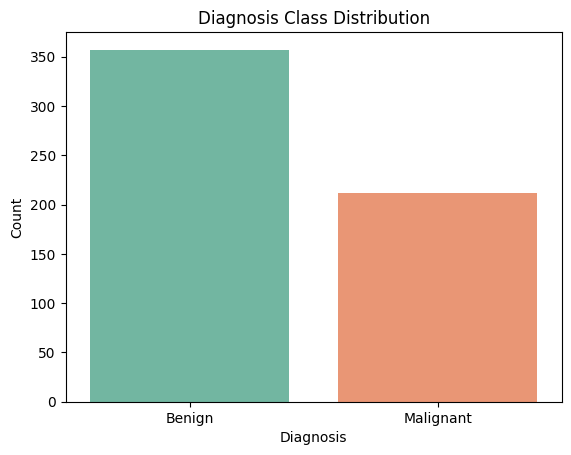

In [6]:

# Plot the count of benign vs malignant
sns.countplot(x='diagnosis', data=df, palette='Set2')
plt.title('Diagnosis Class Distribution')
plt.xticks([0, 1], ['Benign', 'Malignant'])
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.show()


C:\Users\Edidem\AppData\Local\Temp\ipykernel_9712\1179767060.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='diagnosis', y='radius_mean', data=df, palette='Set1')


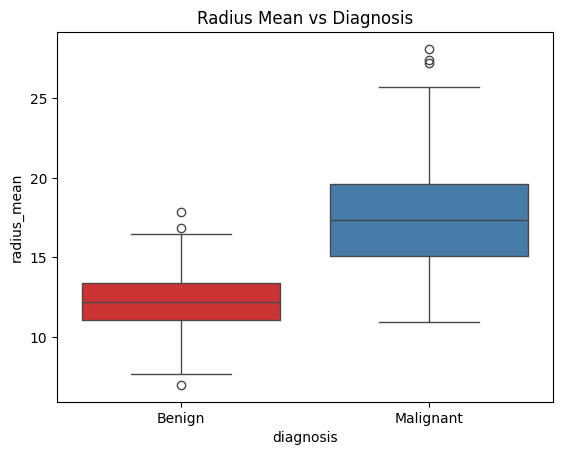

In [7]:
# Example: Compare distribution of radius_mean by class
sns.boxplot(x='diagnosis', y='radius_mean', data=df, palette='Set1')
plt.xticks([0, 1], ['Benign', 'Malignant'])
plt.title('Radius Mean vs Diagnosis')
plt.show()


C:\Users\Edidem\AppData\Local\Temp\ipykernel_9712\1638027546.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='diagnosis', y='area_mean', data=df, palette='Set1')


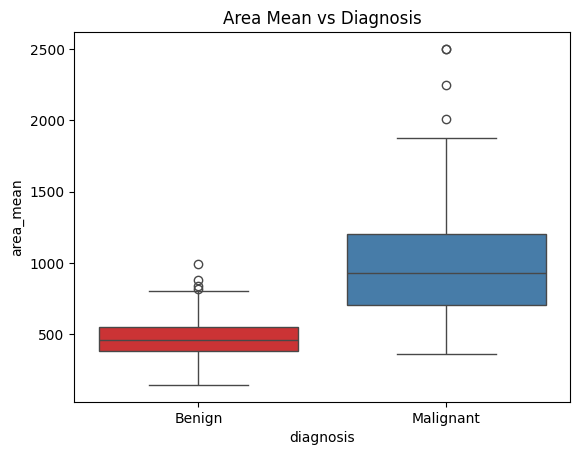

In [8]:
# Example: Compare distribution of area_mean by class
sns.boxplot(x='diagnosis', y='area_mean', data=df, palette='Set1')
plt.xticks([0, 1], ['Benign', 'Malignant'])
plt.title('Area Mean vs Diagnosis')
plt.show()


C:\Users\Edidem\AppData\Local\Temp\ipykernel_9712\1627597496.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='diagnosis', y='concavity_mean', data=df, palette='Set1')


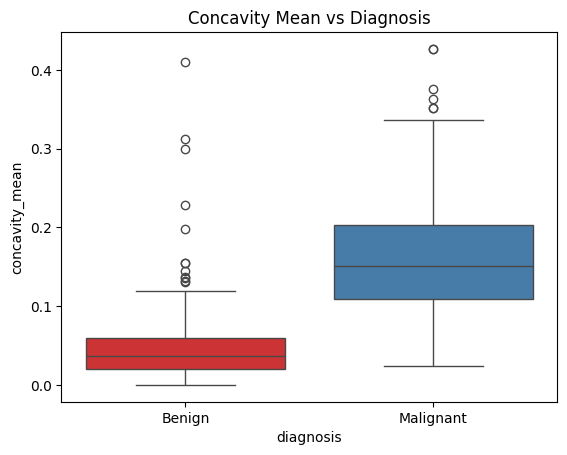

In [9]:
# Example: Compare distribution of concavity_mean by class
sns.boxplot(x='diagnosis', y='concavity_mean', data=df, palette='Set1')
plt.xticks([0, 1], ['Benign', 'Malignant'])
plt.title('Concavity Mean vs Diagnosis')
plt.show()


C:\Users\Edidem\AppData\Local\Temp\ipykernel_9712\1848033159.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='diagnosis', y='texture_mean', data=df, palette='Set1')


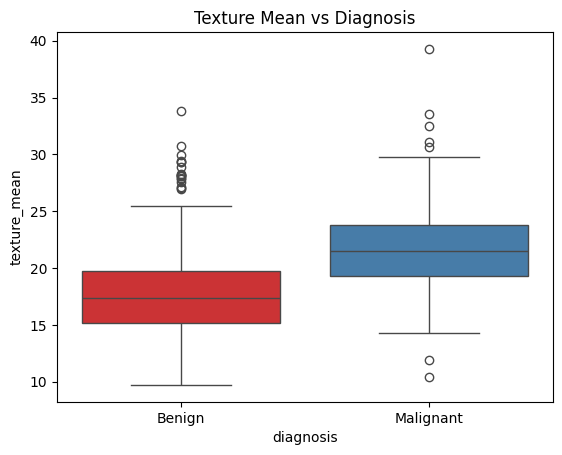

In [10]:
# Example: Compare distribution of texture_mean by class
sns.boxplot(x='diagnosis', y='texture_mean', data=df, palette='Set1')
plt.xticks([0, 1], ['Benign', 'Malignant'])
plt.title('Texture Mean vs Diagnosis')
plt.show()


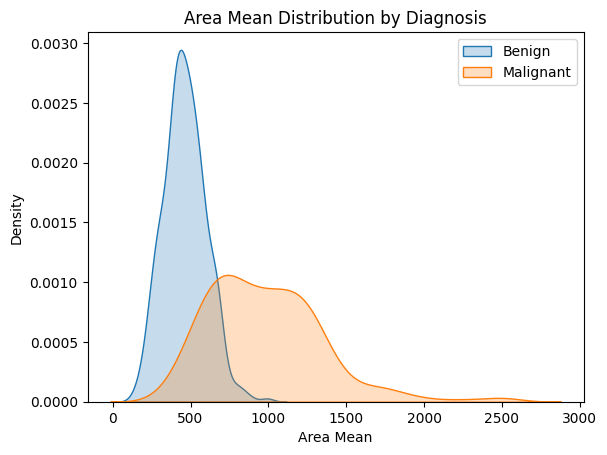

In [12]:
# Distribution of area_mean by class
sns.kdeplot(data=df[df['diagnosis'] == 0]['area_mean'], label='Benign', fill=True)
sns.kdeplot(data=df[df['diagnosis'] == 1]['area_mean'], label='Malignant', fill=True)
plt.title('Area Mean Distribution by Diagnosis')
plt.xlabel('Area Mean')
plt.legend()
plt.show()


C:\Users\Edidem\AppData\Local\Temp\ipykernel_9712\2518143918.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='diagnosis', y='compactness_mean', data=df, palette='coolwarm')


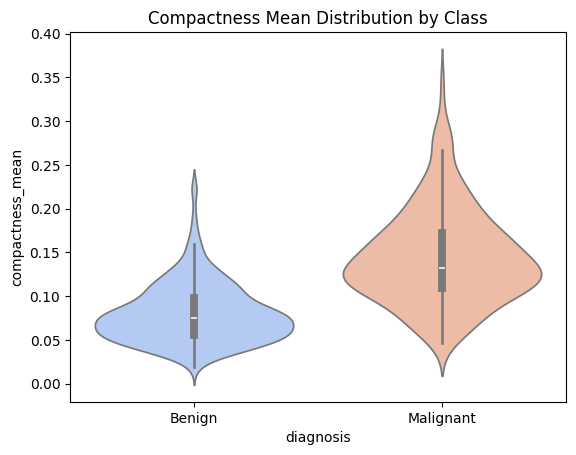

In [13]:
sns.violinplot(x='diagnosis', y='compactness_mean', data=df, palette='coolwarm')
plt.title('Compactness Mean Distribution by Class')
plt.xticks([0, 1], ['Benign', 'Malignant'])
plt.show()


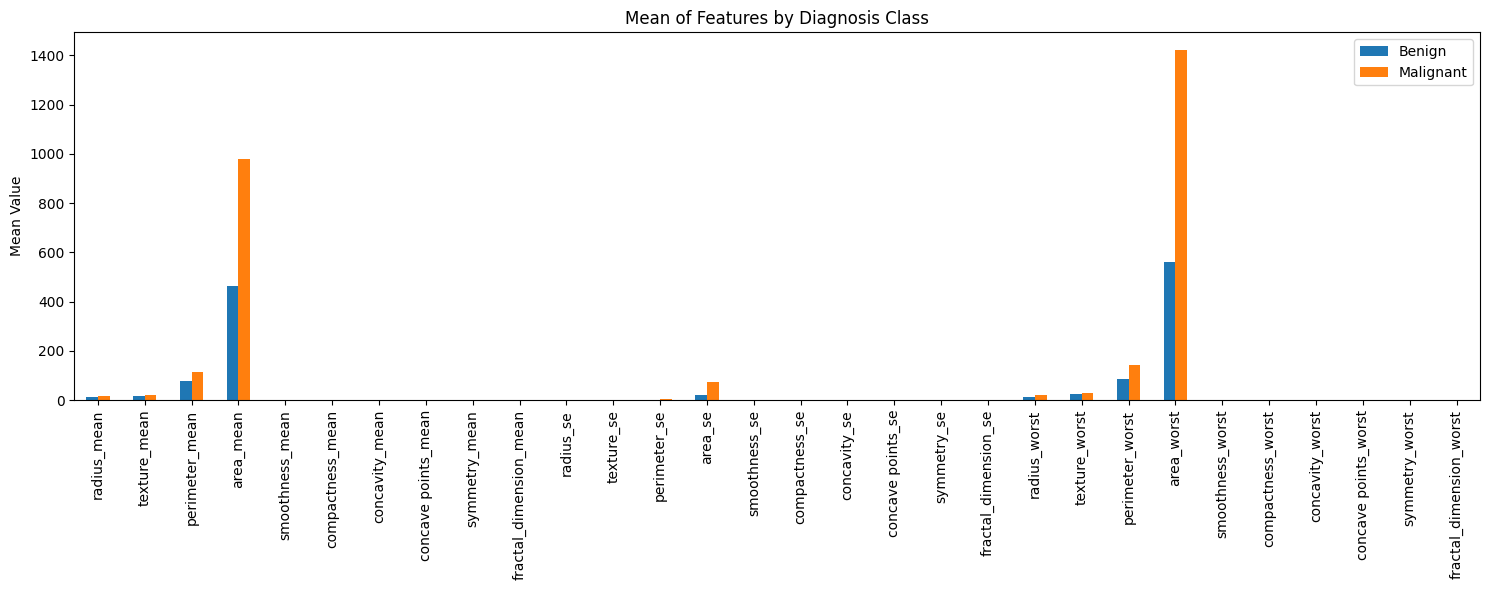

In [14]:
# Compute mean for each class
mean_df = df.groupby('diagnosis').mean().T
mean_df.columns = ['Benign', 'Malignant']
mean_df.plot(kind='bar', figsize=(15,6))
plt.title('Mean of Features by Diagnosis Class')
plt.ylabel('Mean Value')
plt.tight_layout()
plt.show()


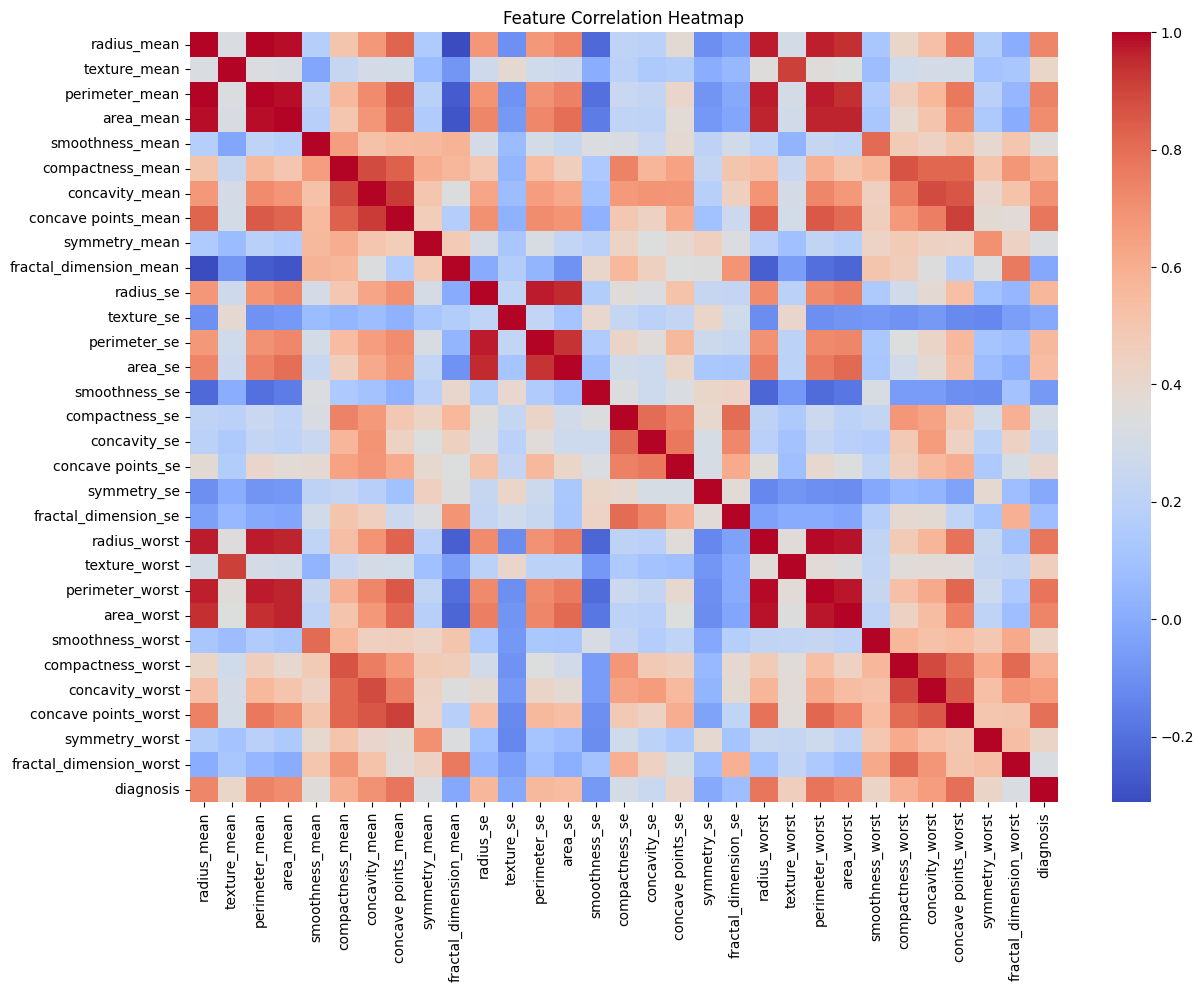

In [16]:
# Convert to DataFrame for easier plotting
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled_df['diagnosis'] = y

# Plot correlation heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(X_scaled_df.corr(), cmap='coolwarm', annot=False)
plt.title('Feature Correlation Heatmap')
plt.show()


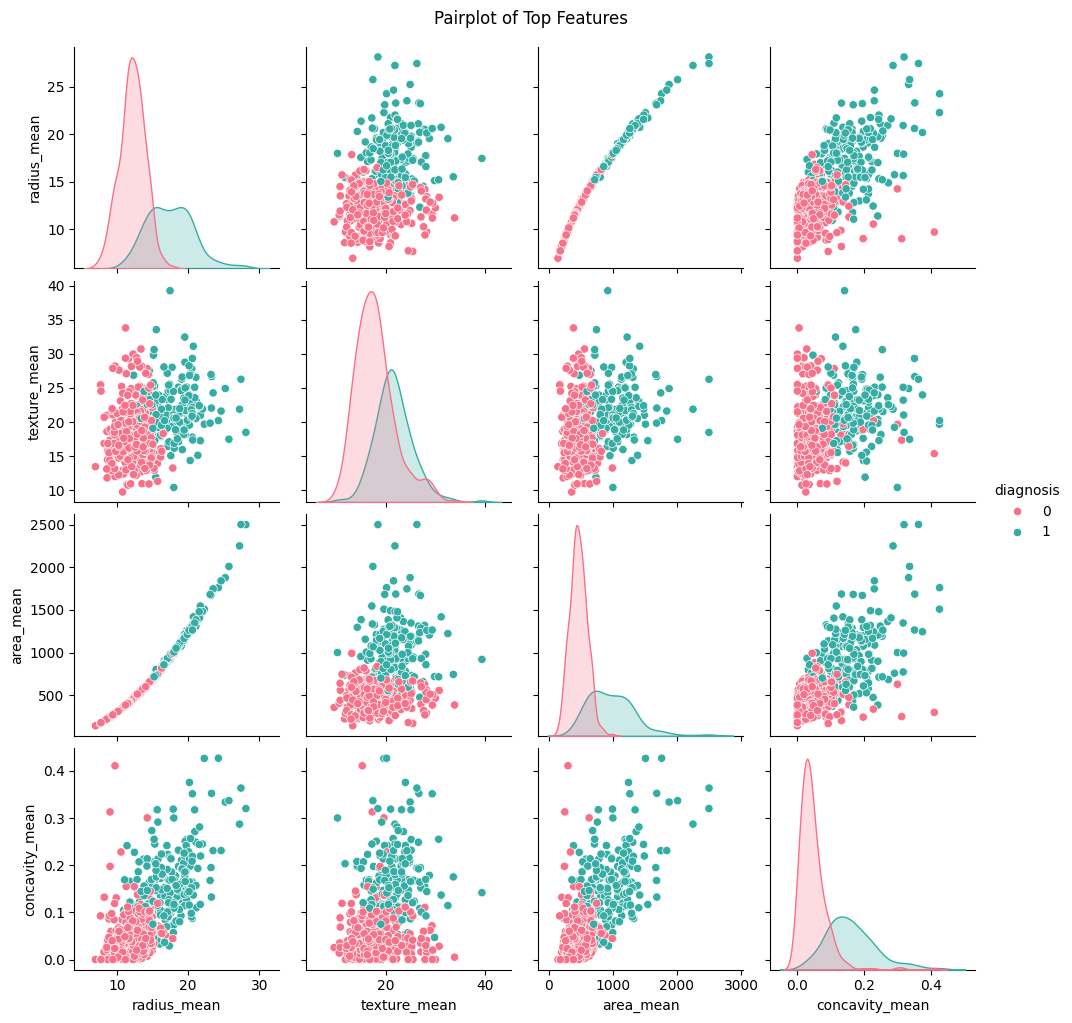

In [ ]:

selected_features = ['radius_mean', 'texture_mean', 'area_mean', 'concavity_mean', 'diagnosis']

sns.pairplot(df[selected_features], hue='diagnosis', palette='husl')
plt.suptitle('Pairplot of Top Features', y=1.02)
plt.show()


# Feature Extraction and Selection

Although the dataset already contains extracted features (e.g., radius_mean, area_mean), 
there is still need to identify which of these 30 features are most relevant for predicting the target variable.

This will be done:
1. Use correlation analysis to find features that are strongly related to the diagnosis label.
2. Select the top N most important features for our model.


In [17]:
# Add the target variable back temporarily to compute correlation
df_corr = df.copy()

# Compute correlation matrix
correlation_matrix = df_corr.corr()

# Get correlation values with diagnosis
corr_with_target = correlation_matrix['diagnosis'].drop('diagnosis')
corr_sorted = corr_with_target.abs().sort_values(ascending=False)

# Display top 10 most correlated features
top_features = corr_sorted.head(10).index.tolist()
print("Top 10 most relevant features:\n", top_features)


Top 10 most relevant features:
 ['concave points_worst', 'perimeter_worst', 'concave points_mean', 'radius_worst', 'perimeter_mean', 'area_worst', 'radius_mean', 'area_mean', 'concavity_mean', 'concavity_worst']


C:\Users\Edidem\AppData\Local\Temp\ipykernel_9712\4046904045.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=corr_sorted.head(10).values, y=top_features, palette='viridis')


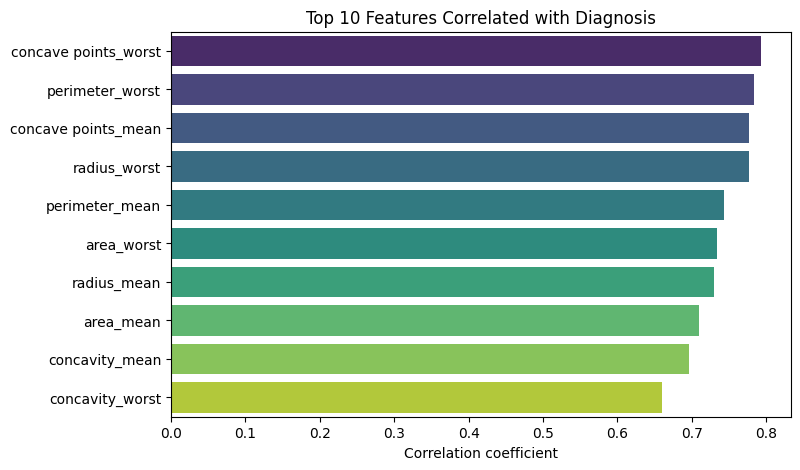

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the correlation values
plt.figure(figsize=(8,5))
sns.barplot(x=corr_sorted.head(10).values, y=top_features, palette='viridis')
plt.title('Top 10 Features Correlated with Diagnosis')
plt.xlabel('Correlation coefficient')
plt.show()


In [19]:
# Use only the selected top 10 features for training
X_selected = df[top_features]


# Split the Feature-Selected Data

Now that the top 10 most relevant features has been selected, they will be scaled 
and splitted into training and testing sets.


In [20]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Scale the selected features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_selected)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)


In [21]:
from sklearn.naive_bayes import GaussianNB

nb_model = GaussianNB()
nb_model.fit(X_train, y_train)


GaussianNB()

Accuracy: 0.9736842105263158

Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98        71
           1       1.00      0.93      0.96        43

    accuracy                           0.97       114
   macro avg       0.98      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



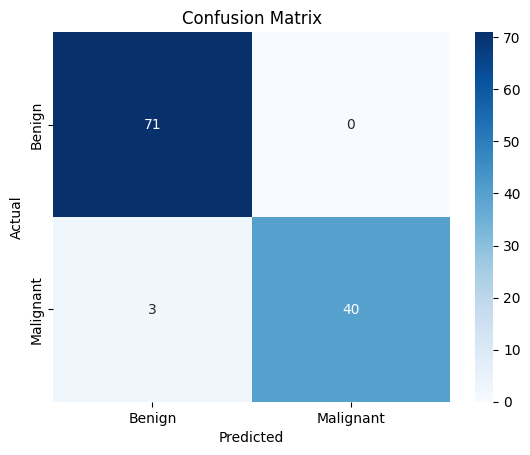

In [22]:
# === Predict and evaluate ===

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = nb_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Benign", "Malignant"], yticklabels=["Benign", "Malignant"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


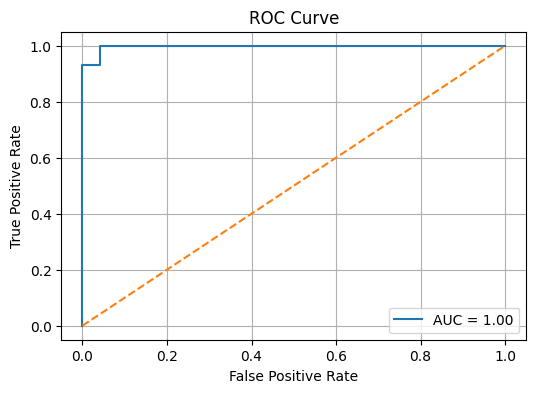

In [23]:
# === ROC Curve and AUC ===

from sklearn.metrics import roc_curve, roc_auc_score

y_probs = nb_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
auc = roc_auc_score(y_test, y_probs)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
plt.plot([0, 1], [0, 1], linestyle='--')
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid()
plt.show()


In [28]:
import joblib

# Save scaler and model together for future use
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(nb_model, 'naive_bayes_model.pkl')


['naive_bayes_model.pkl']